# SMUL - A2 - G09
- João Morais
- Mário Cardoso

In order for the notebook to work, the samples provided in class need to be extracted into ./media/audio/Original

## T1

In [1]:
import essentia
import essentia.standard

loader = essentia.standard.MonoLoader(filename='./media/audio/sine.wav')
sine = loader()

loader = essentia.standard.MonoLoader(filename='./media/audio/whitenoise.wav')
whitenoise = loader()

import IPython
IPython.display.display(IPython.display.Audio('./media/audio/sine.wav'))
IPython.display.display(IPython.display.Audio('./media/audio/whitenoise.wav'))

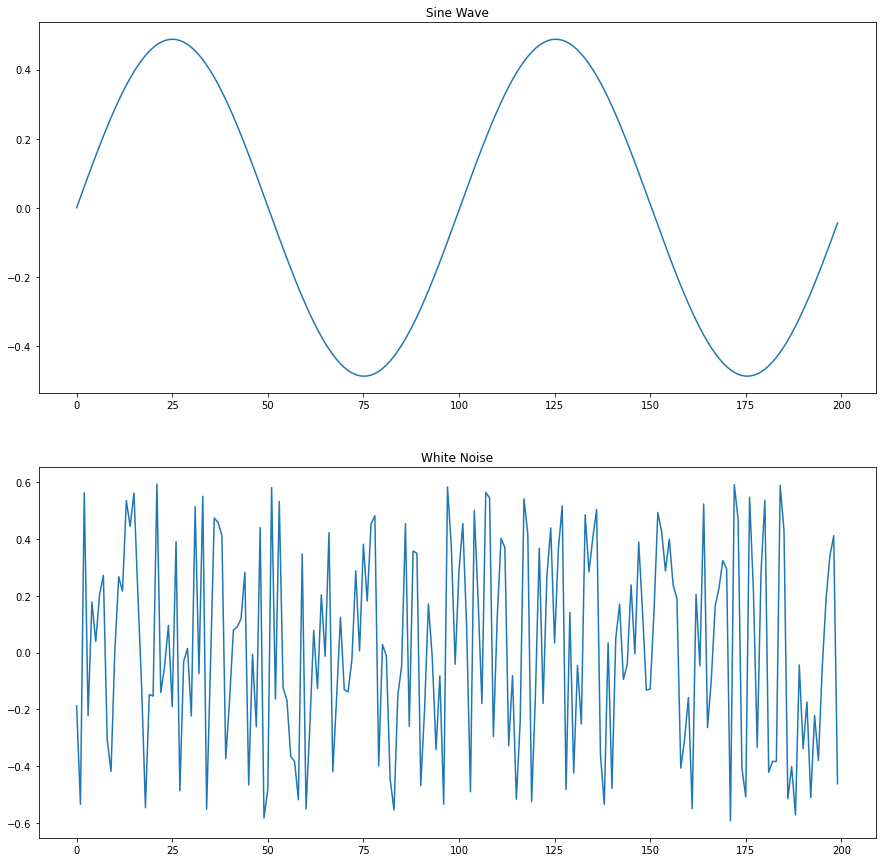

In [2]:
from pylab import plot, show, figure, imshow
%matplotlib inline
import matplotlib.pyplot as plt

loader = essentia.standard.MonoLoader(filename='./media/audio/sine.wav')
sound=loader()

loader = essentia.standard.MonoLoader(filename='./media/audio/whitenoise.wav')
sound1=loader()
fig_wave, ax_wave = plt.subplots(2, 1, figsize = (15, 15))

ax_wave[0].title.set_text("Sine Wave")
ax_wave[0].plot(sound[0:200])

ax_wave[1].title.set_text("White Noise")
ax_wave[1].plot(sound1[0:200])

show()

### Descriptors

In [3]:
from essentia.standard import *
import numpy

def descriptors(audio, frame_size = 1024, hop_size = 512):
    pool = essentia.Pool()
    w = Windowing(type = 'hann')
    spectrum = Spectrum()
    fs=44100
    pool.add('sfx.logattacktime', LogAttackTime()(Envelope()(audio))[0])
    pool.add('sfx.temporalcentroid', TCToTotal()(numpy.absolute(audio)))
    
    #ef_duration = EffectiveDuration(thresholdRatio = 0.4)(Envelope()(audio))
    #normalized_ef_duration = ef_duration/((len(audio))/fs)
    
    pool.add('sfx.effectiveduration', EffectiveDuration(thresholdRatio = 0.4)(Envelope()(audio)))
    
    for frame in FrameGenerator(audio, frameSize = frame_size, hopSize = hop_size): # This sizes are in samples, it seems
        pool.add('lowlevel.rms', RMS()(frame))
        pool.add('lowlevel.zerocrossing', ZeroCrossingRate()(frame))
        pool.add('lowlevel.spectralcentroid', SpectralCentroidTime()(frame))
        pool.add('lowlevel.spectralspread', DistributionShape()(CentralMoments()(spectrum(w(frame))))[0])
        pool.add('lowlevel.spectralflux', Flux()(spectrum((frame))))
        pool.add('lowlevel.spectralflatness', Flatness()(spectrum(w(frame))))
    
    return pool

sine_pool = descriptors(sine)
whitenoise_pool = descriptors(whitenoise)

agg_sine = PoolAggregator(defaultStats = ['mean'])(sine_pool)
agg_whitenoise = PoolAggregator(defaultStats = ['mean'])(whitenoise_pool)

print('Sine wave:')
print('zerocrossing mean - ', agg_sine['lowlevel.zerocrossing.mean']*44100)
print('temporal centroid mean - ', agg_sine['sfx.temporalcentroid.mean'])
print('spectral centroid mean - ', agg_sine['lowlevel.spectralcentroid.mean'])


print('White noise:')
print('zerocrossing mean - ', agg_whitenoise['lowlevel.zerocrossing.mean']*44100)
print('temporal centroid mean - ', agg_whitenoise['sfx.temporalcentroid.mean'])


Sine wave:
zerocrossing mean -  870.7334585487843
temporal centroid mean -  0.5000056624412537
spectral centroid mean -  439.84918212890625
White noise:
zerocrossing mean -  22030.210849642754
temporal centroid mean -  0.5002442002296448


## T2

Sine Pool


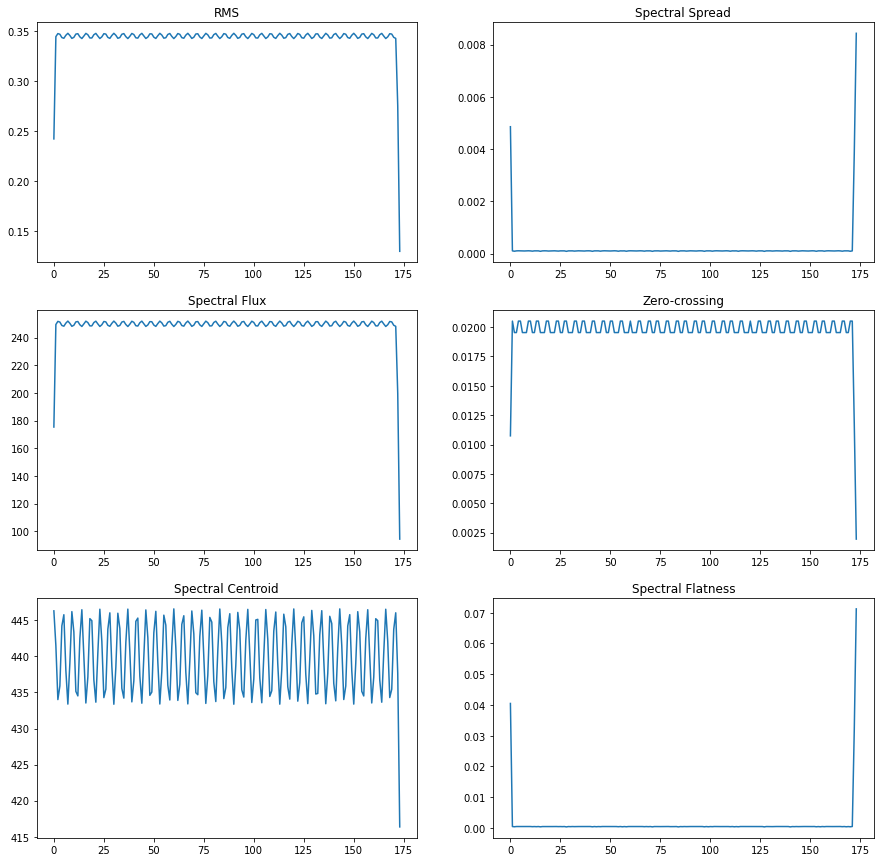

RMS mean:  0.34301140904426575 W
Zero-crossing mean:  870.7334585487843 Hz
Spectral Centroid mean:  439.84918212890625 Hz
Spectral Spread mean:  0.0001980478409677744 Hz
Spectral Flux mean:  248.4179229736328
Spectral Flatness mean:  0.0012589528923854232

Temporal Centroid mean:  0.5000056624412537
Log Attack Time mean:  -1.2345054149627686
Effective Duration mean:  1.9912471771240234

Whitenoise Pool


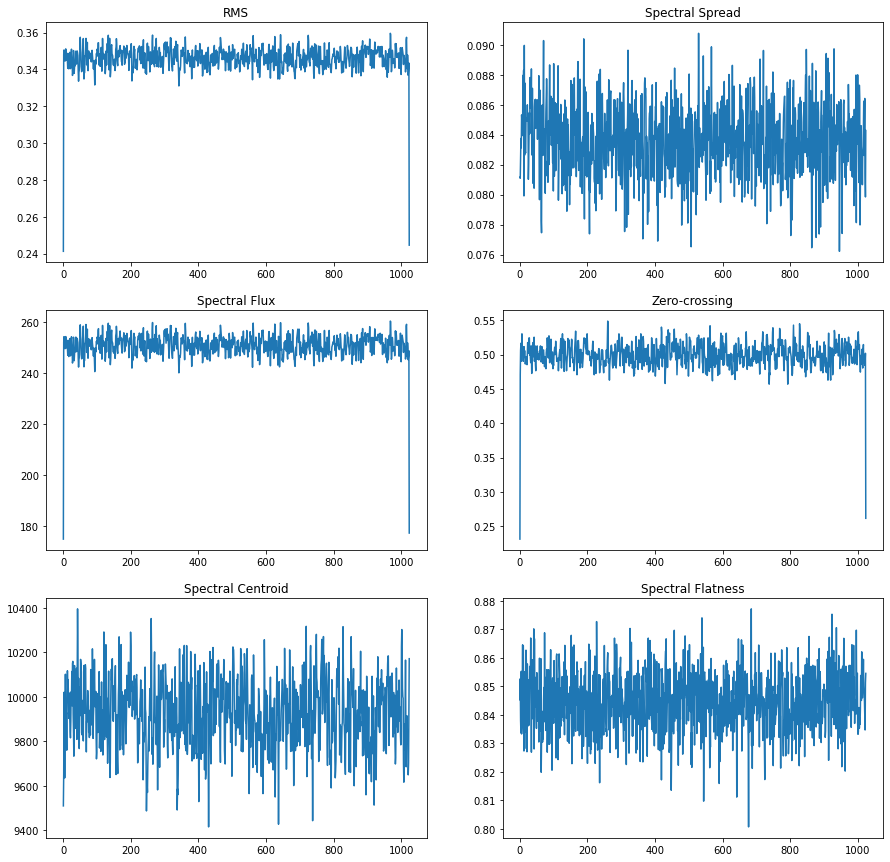

RMS mean:  0.34618648886680603 W
Zero-crossing mean:  22030.210849642754 Hz
Spectral Centroid mean:  9927.8056640625 Hz
Spectral Spread mean:  0.08360683917999268 Hz
Spectral Flux mean:  250.9235382080078
Spectral Flatness mean:  0.844923734664917

Temporal Centroid mean:  0.5002442002296448
Log Attack Time mean:  -0.9901657700538635
Effective Duration mean:  11.876372337341309

String Pool (Guitar)


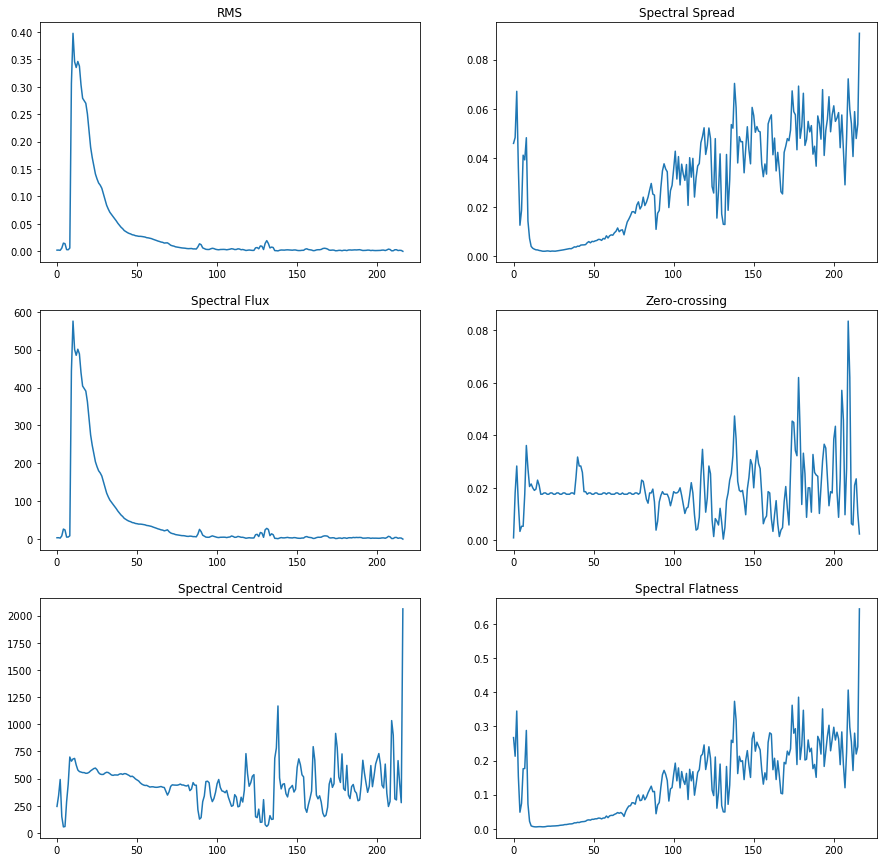

RMS mean:  0.032213203608989716 W
Zero-crossing mean:  855.4734896868467 Hz
Spectral Centroid mean:  447.8393249511719 Hz
Spectral Spread mean:  0.03060939535498619 Hz
Spectral Flux mean:  47.03120040893555
Spectral Flatness mean:  0.14029164612293243

Temporal Centroid mean:  0.1440841406583786
Log Attack Time mean:  -1.182940125465393
Effective Duration mean:  1.6968934535980225

Wind Pool (Sax)


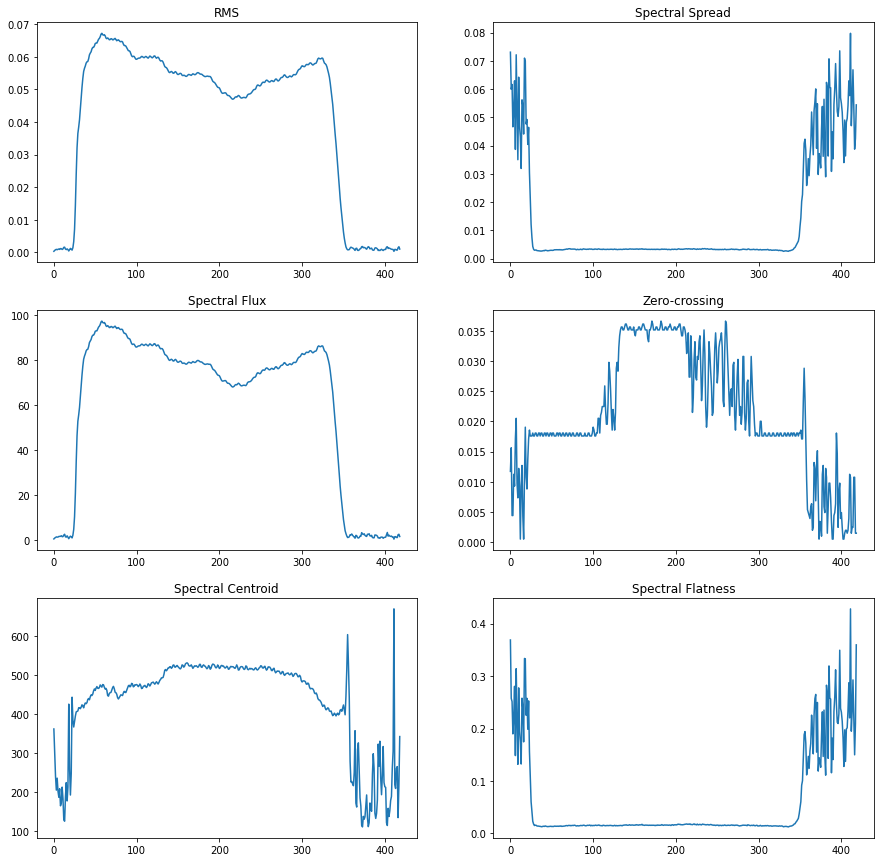

RMS mean:  0.04231545329093933 W
Zero-crossing mean:  940.985550172627 Hz
Spectral Centroid mean:  430.81298828125 Hz
Spectral Spread mean:  0.013190465979278088 Hz
Spectral Flux mean:  61.32722473144531
Spectral Flatness mean:  0.05858044698834419

Temporal Centroid mean:  0.43320852518081665
Log Attack Time mean:  -0.3482782244682312
Effective Duration mean:  8.335556030273438

Percussive Pool (Rimshot)


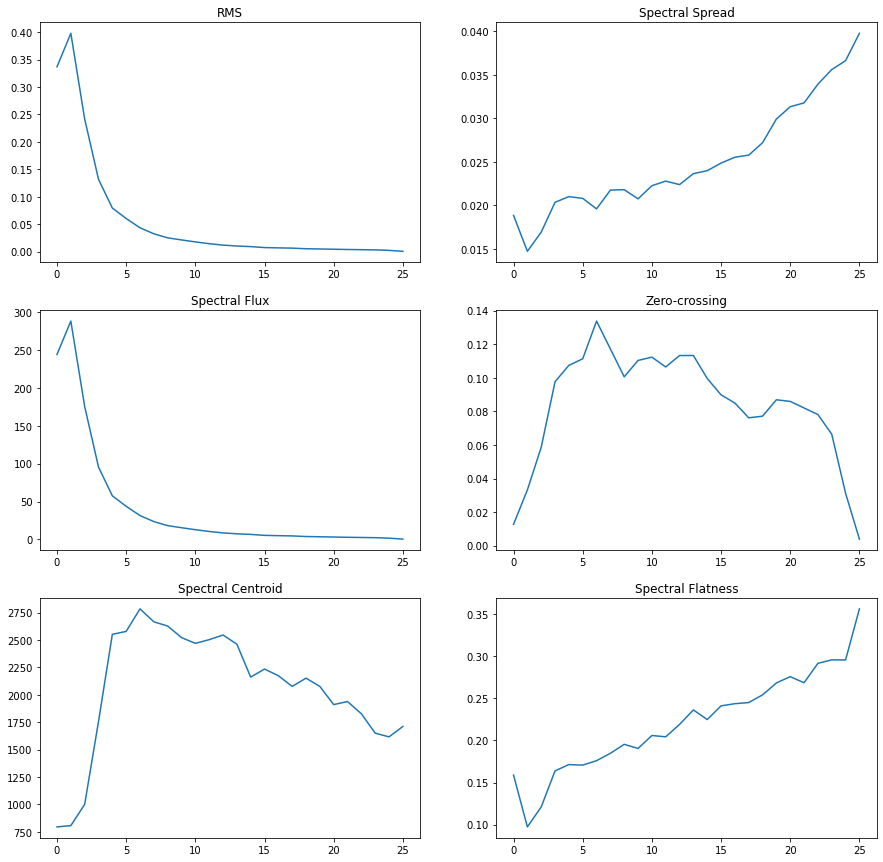

RMS mean:  0.05701310187578201 W
Zero-crossing mean:  3715.3058655560017 Hz
Spectral Centroid mean:  2061.58447265625 Hz
Spectral Spread mean:  0.02514631487429142 Hz
Spectral Flux mean:  41.310604095458984
Spectral Flatness mean:  0.22143448889255524

Temporal Centroid mean:  0.12918217480182648
Log Attack Time mean:  -1.939430594444275
Effective Duration mean:  0.27659863233566284


In [4]:
from essentia.standard import *

def plot_pool(pool):
    fig, ax = plt.subplots(3, 2, figsize = (15, 15))

    ax[0][0].title.set_text("RMS")
    ax[0][0].plot(pool['lowlevel.rms'])

    ax[1][1].title.set_text("Zero-crossing")
    ax[1][1].plot(pool['lowlevel.zerocrossing'])

    ax[2][0].title.set_text("Spectral Centroid")
    ax[2][0].plot(pool['lowlevel.spectralcentroid'])

    ax[0][1].title.set_text("Spectral Spread")
    ax[0][1].plot(pool['lowlevel.spectralspread'])

    ax[1][0].title.set_text("Spectral Flux")
    ax[1][0].plot(pool['lowlevel.spectralflux'])

    ax[2][1].title.set_text("Spectral Flatness")
    ax[2][1].plot(pool['lowlevel.spectralflatness'])

    show()

def print_stats(pool):
    # Auto statistics
    agg = PoolAggregator(defaultStats = ['mean', 'var', 'min', 'max'])(pool)

    print('RMS mean: ', agg['lowlevel.rms.mean'], 'W') # 0.5 / sqrt(2) OK
    print('Zero-crossing mean: ', agg['lowlevel.zerocrossing.mean'] * 44100, 'Hz') # ~870 OKish
    print('Spectral Centroid mean: ', agg['lowlevel.spectralcentroid.mean'], 'Hz') # ~440 OK
    print('Spectral Spread mean: ', agg['lowlevel.spectralspread.mean'], 'Hz') # ~0 OK
    print('Spectral Flux mean: ', agg['lowlevel.spectralflux.mean']) # ~0 OK
    print('Spectral Flatness mean: ', agg['lowlevel.spectralflatness.mean']) # ~0 OK??
    print('\nTemporal Centroid mean: ', agg['sfx.temporalcentroid.mean'])
    print('Log Attack Time mean: ', agg['sfx.logattacktime.mean'])
    print('Effective Duration mean: ', agg['sfx.effectiveduration.mean'])
        
print('Sine Pool')
IPython.display.display(IPython.display.Audio('./media/audio/sine.wav'))
plot_pool(sine_pool)
print_stats(sine_pool)

print('\nWhitenoise Pool')
IPython.display.display(IPython.display.Audio('./media/audio/whitenoise.wav'))
plot_pool(whitenoise_pool)
print_stats(whitenoise_pool)

print('\nString Pool (Guitar)')
loader = essentia.standard.MonoLoader(filename='./media/audio/Original/gui_gref_e_mf_sol3_12.wav')
IPython.display.display(IPython.display.Audio('./media/audio/Original/gui_gref_e_mf_sol3_12.wav'))
guitar_pool = descriptors(loader(), 2048, 1024)
plot_pool(guitar_pool)
print_stats(guitar_pool)

print('\nWind Pool (Sax)')
loader = essentia.standard.MonoLoader(filename='./media/audio/Original/sax_gref_mf_sol3_12.wav')
IPython.display.display(IPython.display.Audio('./media/audio/Original/sax_gref_mf_sol3_12.wav'))
sax_pool = descriptors(loader(), 2048, 1024)
plot_pool(sax_pool)
print_stats(sax_pool)

print('\nPercussive Pool (Rimshot)')
loader = essentia.standard.MonoLoader(filename='./media/audio/Original/per_56454__surfjira__snare-rimshot-hard3.wav')
IPython.display.display(IPython.display.Audio('./media/audio/Original/per_56454__surfjira__snare-rimshot-hard3.wav'))
drum_pool = descriptors(loader())
plot_pool(drum_pool)
print_stats(drum_pool)



## T3

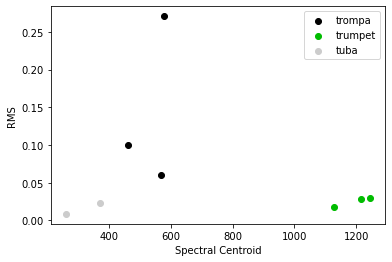

In [5]:
import glob
import numpy

def descriptor_tuples(pattern, x_desc, y_desc):
    files = glob.glob('./media/audio/Original/' + pattern)
    tuples = []
    
    for file in files:
        pool = descriptors(essentia.standard.MonoLoader(filename=file)())
        agg = PoolAggregator(defaultStats = ['mean', 'var', 'min', 'max'])(pool)
        tuples.append((agg[x_desc], agg[y_desc]))
        
    return tuples

def plot_correlation_instrument(desc_1, desc_2, label_1, label_2, title = '', **kwargs):
    fig, ax = plt.subplots()
    colormap = plt.cm.nipy_spectral
    colors = [colormap(i) for i in numpy.linspace(0, 1, len(kwargs))]
    ax.set_prop_cycle('color', colors)
    
    for key, value in kwargs.items():
        tuples = []
        for pattern in value:
            tuples.extend(descriptor_tuples(pattern, desc_1, desc_2))
        
        ax.scatter(*zip(*tuples), label = key)
    
    ax.set_xlabel(label_1)
    ax.set_ylabel(label_2)
    ax.set_title(title)
    ax.legend()
    show()

plot_correlation_instrument('lowlevel.spectralcentroid.mean', 'lowlevel.rms.mean',
                 'Spectral Centroid', 'RMS',
                  trompa = ['tbtb*.wav'],
                  trumpet = ['trpu*.wav'],
                  tuba = ['tubb*.wav'])

## T5

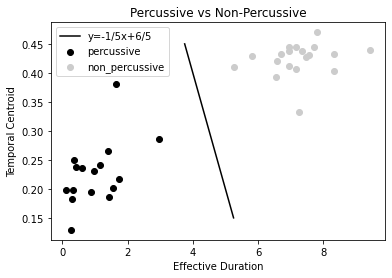

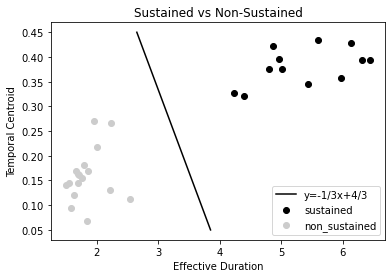

In [6]:
def plot_correlation_group(desc_1, desc_2, label_1, label_2, x, y, label='', title = '', **kwargs):
    fig, ax = plt.subplots()
    colormap = plt.cm.nipy_spectral
    colors = [colormap(i) for i in numpy.linspace(0, 1, len(kwargs))]
    ax.set_prop_cycle('color', colors)
    
    for key, value in kwargs.items():
        tuples = []
        for pattern in value:
            tuples.extend(descriptor_tuples(pattern, desc_1, desc_2))
        
        ax.scatter(*zip(*tuples), label = key)
    
    ax.plot(x, y, label = label)
    ax.set_xlabel(label_1)
    ax.set_ylabel(label_2)
    ax.set_title(title)
    ax.legend()
    show()

# New approach, as in Task 3, but now for sets of instruments
plot_correlation_group( 'sfx.effectiveduration.mean','sfx.temporalcentroid.mean',
                       'Effective Duration', 'Temporal Centroid',
                       -5*numpy.linspace(0.15,0.45,100)+6,
                       numpy.linspace(0.15,0.45,100),
                       'y=-1/5x+6/5',
                       'Percussive vs Non-Percussive',
                       percussive = ['per*.wav'],
                       non_percussive = ['vln*.wav', 'vcl*.wav', 'sax*.wav']
                 )

plot_correlation_group( 'sfx.effectiveduration.mean','sfx.temporalcentroid.mean',
                       'Effective Duration', 'Temporal Centroid',
                       -3*numpy.linspace(0.05,0.45,100)+4,
                       numpy.linspace(0.05,0.45,100),
                       'y=-1/3x+4/3',
                       'Sustained vs Non-Sustained',
                       sustained = ['bsn*.wav', 'acco*.wav'],
                       non_sustained = ['harp*.wav', 'gui*.wav']
                      )


Timbre: Acoustics, Perception, and Cognition
Volume 69 of Springer Handbook of Auditory Research, pg. 309

The Timbre Toolbox: Extracting audio descriptors from musical
signals